## Programming Exercise 7: _K_-means Clustering and Principal Component Analysis

In [135]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import imageio #Used to load the image files
from random import sample #Used for random initialization
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
from scipy import linalg #Used for the "SVD" function
from PIL import Image # Used for creating an image from an array
from scipy.spatial import distance #used for calc distance between X and centroid

### 1 _K_-means Clustering
#### 1.1 Implementing _K_-means
##### 1.1.1 Finding closest centroids

In [136]:
#Read in ex7data2.mac
datafile = 'ex7data2.mat'
mat = scipy.io.loadmat(datafile )
X = mat['X']

#X is 300 points, each has two coordinates
#IE the shape is (300,2)

In [137]:
#Choose the number of centroids... K = 3
K = 3
#Choose the initial centroids matching ex7.m assignment script
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [138]:
X.shape


(300, 2)

In [139]:
#Visualizing the data
def plotData(myX,mycentroids,myidxs = None):

    """
    Fucntion to plot the data and color it accordingly.
    myidxs should be the latest iteraction index vector
    mycentroids should be a vector of centroids, one per iteration
    """
    
    colors = ['b','g','gold','darkorange','salmon','olivedrab']
    
    assert myX[0].shape == mycentroids[0][0].shape
    assert mycentroids[-1].shape[0] <= len(colors)

    #If idxs is supplied, divide up X into colors
    ## Keep the None here!! 
    if myidxs is not None:
        assert myidxs.shape[0] == myX.shape[0]
        subX = []
        for x in range(mycentroids[0].shape[0]):
            subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    else:
        subX = [myX]
        
    fig = plt.figure(figsize=(7,5))
    for x in range(len(subX)):
        newX = subX[x]
        plt.plot(newX[:,0],newX[:,1],'o',color=colors[x],
                 alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)

    #Drawing a history of centroid movement
    tempx, tempy = [], []
    for mycentroid in mycentroids:
        tempx.append(mycentroid[:,0])
        tempy.append(mycentroid[:,1])
    
    for x in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)

    leg = plt.legend(loc=4, framealpha=0.5)

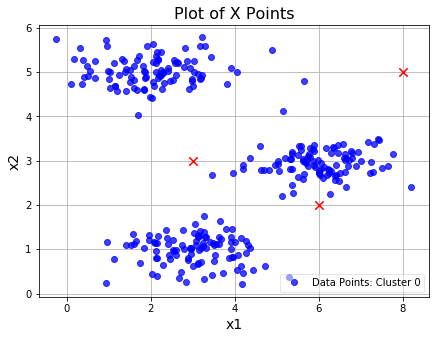

In [140]:
plotData(X,[initial_centroids])

In [141]:
def distSquared(point1, point2):
    assert point1.shape == point2.shape
    dst = distance.euclidean(point1,point2)
    return dst

In [142]:
#initial_centroids.shape[0]

In [143]:
#for j in range(3):
    #mycentroid=initial_centroids[j]

IndentationError: unexpected indent (<ipython-input-143-fe2c7b0a1da3>, line 2)

In [86]:
#test=distSquared(X[1],initial_centroids[1])

In [87]:
#test

In [144]:
def findClosestCentroids(myX, mycentroids):
    """
    Function takes in the (m,n) X matrix
    (where m is the # of points, n is # of features per point)
    and the (K,n) centroid seed matrix
    (where K is the # of centroids (clusters)
    and returns a (m,1) vector of cluster indices 
    per point in X (0 through K-1)
    """
    idxs = np.zeros((myX.shape[0], 1))
    
    #Loop through each data point in X
    for i in range(myX.shape[0]):
        x = myX[i]
        #Compare this point to each centroid,
        #Keep track of shortest distance and index of shortest distance
        mindist, idx = 9999999, 0
        for j in range(3):
            mycentroid = mycentroids[j]
            dst = distSquared(x,mycentroid)
            if dst < mindist:
                mindist = dst
                idx = j
        #With the best index found, modify the result idx vector
        idxs[i] = idx
        
    return idxs

 

In [145]:
idxs = findClosestCentroids(X, initial_centroids)

#you should see the output [1 3 2] corresponding to the 
#centroid assignments for the first 3 examples.
#Note my indices start at 0, so I should see [0, 2, 1]
print(idxs[:3].flatten())

[0. 2. 1.]


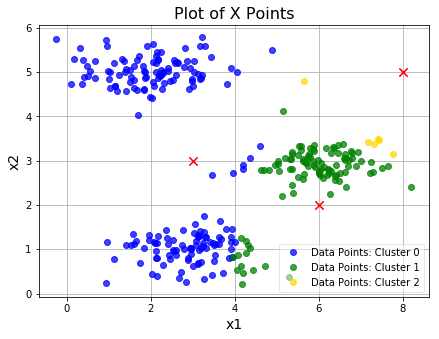

In [146]:
plotData(X,[initial_centroids],idxs)

##### 1.1.2 Computing centroid means

In [147]:
def computeCentroids(myX, myidxs):
    """
    Function takes in the X matrix and the index vector
    and computes a new centroid matrix.
    """
    subX = []
    for x in range(len(np.unique(myidxs))):
        subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    return np.array([np.mean(thisX,axis=0) for thisX in subX])

#### 1.2 _K_-means on example dataset

In [148]:
def runKMeans(myX, initial_centroids,K, n_iter):
    """
    Function that actually does the iterations.. oops.. made a random initial centroid too soon.
    why is K in here?
    """
    centroid_history = []
    #C_x=np.random.randint(np.min(X),np.max(X), size=K)
    #C_y=np.random.randint(np.min(X), np.max(X), size=K)
    #initial_centroids=np.array(list(zip(C_x,C_y)), dtype=np.float32)
    current_centroids = initial_centroids
    for myiter in range(n_iter):
        centroid_history.append(current_centroids)
        idxs = findClosestCentroids(myX,current_centroids)
        current_centroids = computeCentroids(myX,idxs)
        
    return idxs, centroid_history

In [149]:
# Number of clusters
#k = 3
# X coordinates of random centroids
#C_x = np.random.randint(np.min(X), np.max(X), size=k)
# Y coordinates of random centroids
#C_y = np.random.randint(np.min(X), np.max(X), size=k)
#C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[3. 0.]
 [5. 5.]
 [4. 2.]]


In [150]:
#np.max(X)

In [151]:
# Call runKMeans with K = 3, n_iter = 10
newidxs, centroid_history = runKMeans(X,initial_centroids,K=3,n_iter=10)

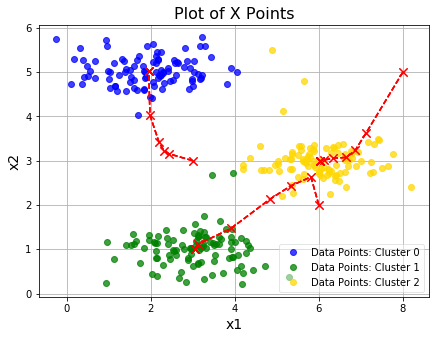

In [152]:
plotData(X,centroid_history,newidxs)

#### 1.3 Random initialization

In [153]:
def chooseKRandomCentroids(myX, K):
    rand_indices = sample(range(0,myX.shape[0]),K)
    return np.array([myX[i] for i in rand_indices])    

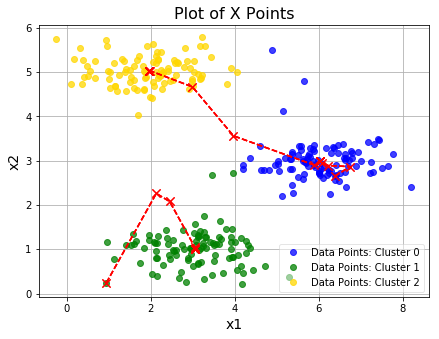

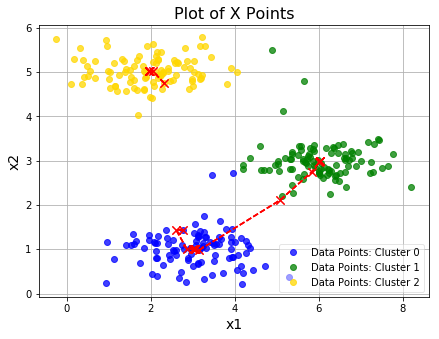

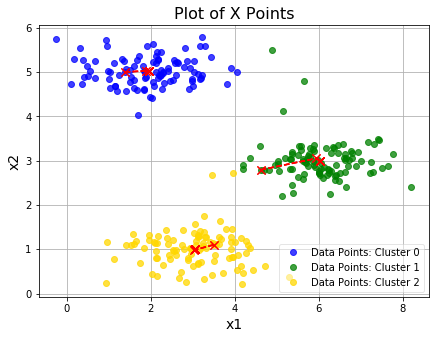

In [154]:
#Let's choose random initial centroids and see the resulting 
#centroid progression plot.. perhaps three times in a row
for x in range(3):
    # Call runKMeans with K = 3, n_iter = 10
    idxs, centroid_history = runKMeans(X,chooseKRandomCentroids(X,K=3),
                                       K=3 ,n_iter=10 )
    plotData(X,centroid_history,idxs)

#### 1.4 Image compression with _K_-means
##### 1.4.1 _K_-means on pixels

A shape is (128, 128, 3)


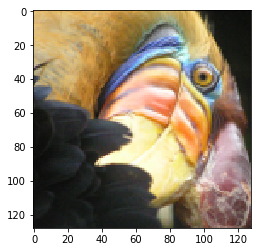

In [239]:
datafile = 'bird_small.png'

# This creates a three-dimensional matrix A whose first two indices 
# identify a pixel position and whose last index represents red, green, or blue.
A = imageio.imread('bird_small.png')

print("A shape is", A.shape)
dummy = plt.imshow(A)

In [240]:
# Note: This cell takes ~1 minute to run

# Divide every entry in A by 255 so all values are in the range of 0 to 1
A = A / 255.

# Unroll the image to shape (16384,3) (16384 is 128*128)
A = A.reshape(-1, 3)

# Run k-means on this data, forming 16 clusters, with random initialization
A = A.reshape(-1, 3)

myK = 16
idxs, centroid_history = runKMeans(A,chooseKRandomCentroids(A,K=16),
                                   K=16,n_iter=10)

In [241]:
# Now I have 16 centroids, each representing a color.
# Let's assign an index to each pixel in the original image dictating
# which of the 16 colors it should be
idxs = findClosestCentroids(A, centroid_history[-1])

In [242]:
final_centroids = centroid_history[-1]
# Now loop through the original image and form a new image
# that only has 16 colors in it
final_image = np.zeros((idxs.shape[0],3))
for x in range(final_image.shape[0]):
    final_image[x] = final_centroids[int(idxs[x])]

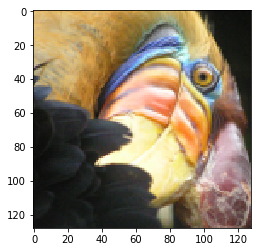

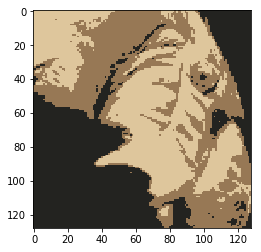

In [243]:
# Reshape the original image and the new, final image and draw them
# To see what the "compressed" image looks like
plt.figure()
dummy = plt.imshow(A.reshape(128,128,3))
plt.figure()
dummy = plt.imshow(final_image.reshape(128,128,3))

### 2 Principal Component Analysis
#### 2.1 Example Dataset

In [118]:
mat

{'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
        [3.22382902, 4.94255585],
        [4.92948801, 5.95501971],
        [5.79295774, 5.10839305],
        [2.81684824, 4.81895769],
        [

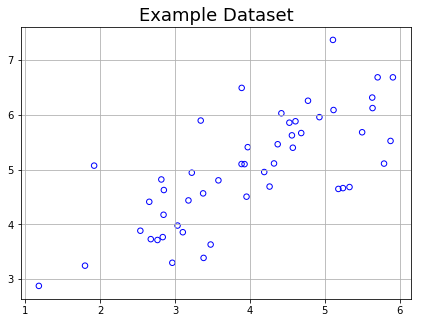

In [160]:
datafile = 'ex7data1.mat'
mat = scipy.io.loadmat( 'ex7data1.mat' )
X = mat['X']

#Quick plot
plt.figure(figsize=(7,5))
plot = plt.scatter(X[:,0], X[:,1], s=30, facecolors='none', edgecolors='b')
plt.title("Example Dataset",fontsize=18)
plt.grid(True)

#### 2.2 Implementing PCA

In [121]:
#means=np.mean(X,axis=0)
#print(means)

[3.98926528 5.00280585]


In [123]:
#myXnorm=X-means
#print(myXnorm)

[[-0.60770261 -1.61369317]
 [ 0.5386101   0.85137225]
 [-1.33358341 -0.59081113]
 [-1.22403061 -1.2873922 ]
 [-1.14270518 -0.8272994 ]
 [-0.09859333  1.48557502]
 [-0.51346004 -1.36995709]
 [ 1.92203316  1.67796268]
 [-0.06037131  0.09564076]
 [ 0.57257008  0.62049344]
 [ 0.58480642  0.39484484]
 [ 0.38246828  0.45835964]
 [ 0.20242859 -0.04811226]
 [ 1.2548199  -0.34131818]
 [-1.15342508 -1.23478869]
 [ 1.64600441  1.30930853]
 [ 0.6970644   0.66243525]
 [-1.13875191 -0.37634958]
 [ 1.12089202  2.36039077]
 [ 1.19329849 -0.35629676]
 [ 1.71806281  1.6782341 ]
 [-0.4095807  -0.20002511]
 [ 1.65011245  1.11763009]
 [ 0.27420323 -0.31337689]
 [-1.45274835 -1.11831507]
 [-0.76543626 -0.06025   ]
 [ 0.94022273  0.95221386]
 [ 1.80369246  0.1055872 ]
 [-1.17241704 -0.18384816]
 [-0.10044114  0.09755979]
 [-0.64603109  0.8902076 ]
 [ 1.89046886  0.51861079]
 [-0.88534616 -1.14570343]
 [ 1.34224044 -0.3220635 ]
 [-0.61383841 -0.43742733]
 [ 0.7874136   1.25154454]
 [-1.31351898 -1.27183597]
 

In [162]:
def featureNormalize(myX):
    #Feature-normalize X, return it
    means = np.mean(myX,axis=0)
    myX_norm = (myX-means)
    stds  = np.std(myX_norm,axis=0,dtype=np.float64)
    myX_norm = (myX_norm/stds)
    return means, stds, myX_norm

In [165]:
#means, stds, myX_norm=featureNormalize(X)

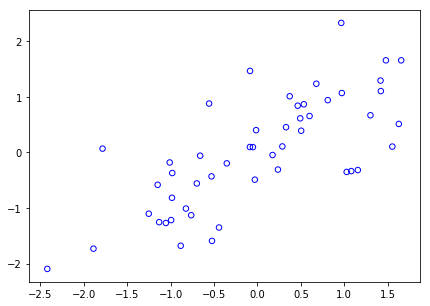

In [166]:
#plt.figure(figsize=(7,5))
#plot = plt.scatter(myX_norm[:,0], myX_norm[:,1], s=30, facecolors='none', edgecolors='b')

In [167]:
def getUSV(myX_norm):
    # Compute the covariance matrix
    cov_matrix = (myX_norm.T.dot(myX_norm))/(myX_norm.shape[0])
    # Run single value decomposition to get the U principal component matrix
    U, S, V = scipy.linalg.svd(cov_matrix, full_matrices = True, compute_uv = True)
    return U, S, V

In [168]:
# Feature normalize
means, stds, X_norm = featureNormalize(X)
# Run SVD
U, S, V = getUSV(X_norm)

Top principal component is  [-0.70710678 -0.70710678]


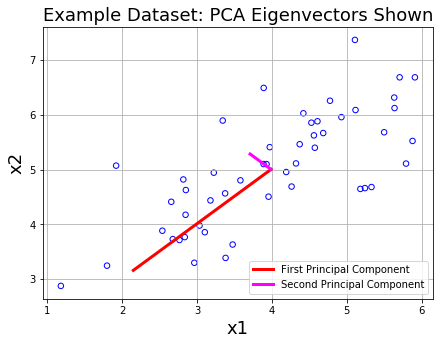

In [169]:
# "...output the top principal component (eigen- vector) found, 
# and you should expect to see an output of about [-0.707 -0.707]"
print('Top principal component is ',U[:,0])

#Quick plot, now including the principal component
plt.figure(figsize=(7,5))
plot = plt.scatter(X[:,0], X[:,1], s=30, facecolors='none', edgecolors='b')
plt.title("Example Dataset: PCA Eigenvectors Shown",fontsize=18)
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.grid(True)
#To draw the principal component, you draw them starting
#at the mean of the data
plt.plot([means[0], means[0] + 1.5*S[0]*U[0,0]], 
         [means[1], means[1] + 1.5*S[0]*U[0,1]],
        color='red',linewidth=3,
        label='First Principal Component')
plt.plot([means[0], means[0] + 1.5*S[1]*U[1,0]], 
         [means[1], means[1] + 1.5*S[1]*U[1,1]],
        color='fuchsia',linewidth=3,
        label='Second Principal Component')
leg = plt.legend(loc=4)

#### 2.3 Dimensionality Reduction with PCA
##### 2.3.1 Projecting the data onto the principal components

In [187]:
def projectData(myX, myU, K):
    """
    Function that computes the reduced data representation when
    projecting only on to the top "K" eigenvectors
    """
    
    #Reduced U is the first "K" columns in U
    Ureduced = myU[:,K-1]
    z = myX.dot(Ureduced)
    return z

In [186]:
U[:,K-1]

array([-0.70710678, -0.70710678])

In [188]:
# "...project the first example onto the first dimension 
# "and you should see a value of about 1.481"
z = projectData(X_norm,U,K=1)
print('Projection of the first example is', z[0])

Projection of the first example is 1.496312608457852


##### 2.3.2 Reconstructing an approximation of the data

In [189]:
def recoverData(myZ, myU, K):
    Ureduced = myU[:,(K-1)]
    Ureduced = np.reshape(Ureduced,(Ureduced.shape[0],1))
    myZ = np.reshape(myZ,(myZ.shape[0],1))
    Xapprox = myZ.dot(Ureduced.T)
    return Xapprox

In [190]:
X_rec = recoverData(z,U,1)
print('Recovered approximation of the first example is ',X_rec[0])

Recovered approximation of the first example is  [-1.05805279 -1.05805279]


In [192]:
z.shape

(50,)

##### 2.3.3 Visualizing the projections

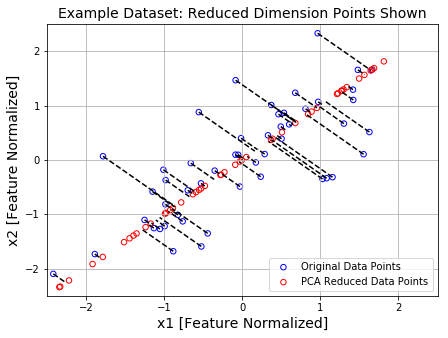

In [193]:
#Quick plot, now drawing projected points to the original points
plt.figure(figsize=(7,5))
plot = plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
plot = plt.scatter(z, z, s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)
plt.grid(True)

for x in range(X_norm.shape[0]):
    plt.plot([X_norm[x,0],X_rec[x,0]],[X_norm[x,1],X_rec[x,1]],'k--')
    
leg = plt.legend(loc=4)

#Force square axes to make projections look better
dummy = plt.xlim((-2.5,2.5))
dummy = plt.ylim((-2.5,2.5))

#### 2.4 Face Image Dataset

In [194]:
datafile = 'ex7faces.mat'
mat = scipy.io.loadmat( 'ex7faces.mat' )
X = mat['X']

In [197]:
X.shape

(5000, 1024)

In [198]:
def getDatumImg(row):
    """
    Function that is handed a single np array with shape 1x1032,
    crates an image object from it, and returns it
    """
    width, height = 32, 32
    square = row.reshape(width, height)
    return square.T
    
def displayData(myX, mynrows = 10, myncols = 10):
    """
    Function that picks the first 100 rows from X, creates an image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 32, 32
    nrows, ncols = mynrows, myncols

    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in range(nrows*ncols):
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(myX[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(10,10))
    img = Image.fromarray( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)

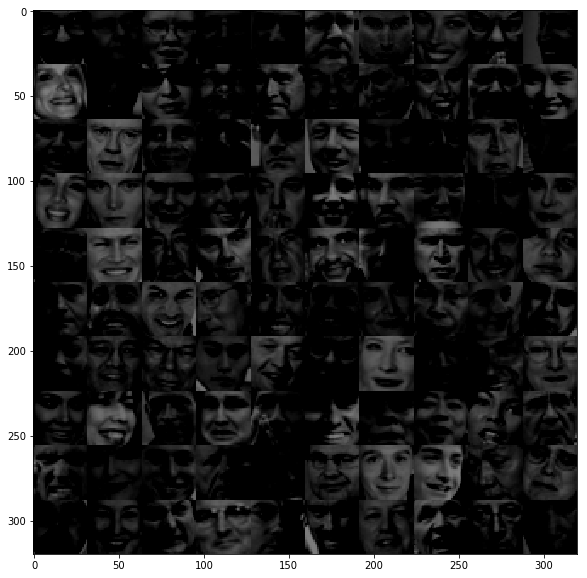

In [199]:
displayData(X)

##### 2.4.1 PCA on Faces

In [200]:
# Feature normalize
means, stds, X_norm = featureNormalize(X)
# Run SVD
U, S, V = getUSV(X_norm)

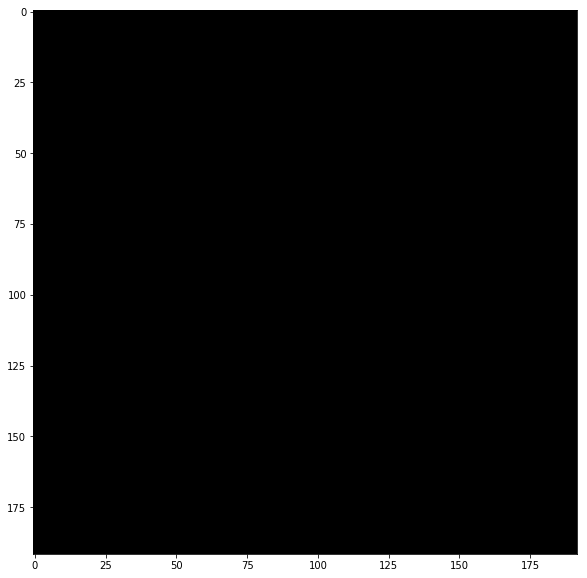

In [201]:
# Visualize the top 36 eigenvectors found
# "Eigenfaces" lol
displayData(U[:,:36].T,mynrows=6,myncols=6)

##### 2.4.2 Dimensionality Reduction

In [202]:
# Project each image down to 36 dimensions
z = projectData(X_norm,U,K=36)

In [203]:
# Attempt to recover the original data
X_rec = recoverData(z, U, K=36)

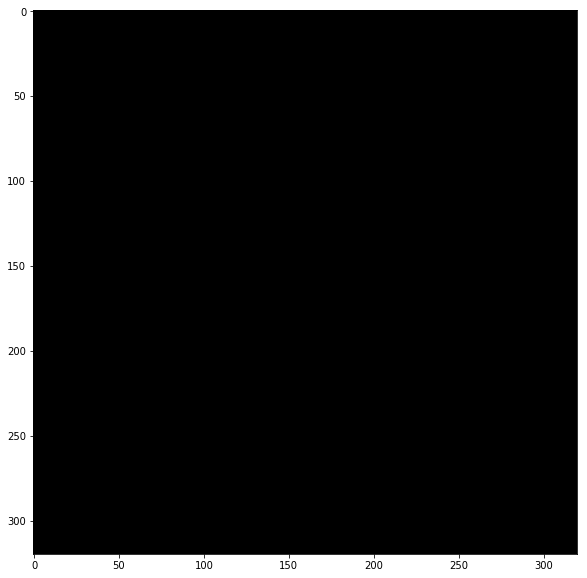

In [204]:
# Plot the dimension-reduced data
displayData(X_rec)

#### 2.5 PCA for visualization

In [209]:
# Here we display the 16 color clusters from before in 2D because a 3D
# display (r, g, b) is too cumbersome to look at.
# PCA projects the 3D into 2D to visualize.

# Recall "A" is the original image unrolled, shape (16384, 3)
# and "idxs" is shape (16384, 1) with entries in [0, 15]
#Feature-normalize A, save it as A_norm
# Feature normalize
means, stds, A_norm = featureNormalize(A)
# Run SVD
U, S, V = getUSV(A_norm)

In [210]:
A_norm

Image([[ 0.99589399,  0.86816022,  0.19048253],
       [ 1.12686033,  0.93746042,  0.40224776],
       [ 1.07923621,  0.95132047,  0.30450996],
       ...,
       [-0.83763476, -1.03066548, -0.85205402],
       [-0.92097698, -1.11382573, -0.86834365],
       [-0.99241317, -1.08610565, -0.93350219]])

In [218]:
# Use PCA to go from 3->2 dimensions
z = projectData(A_norm,U, 2)

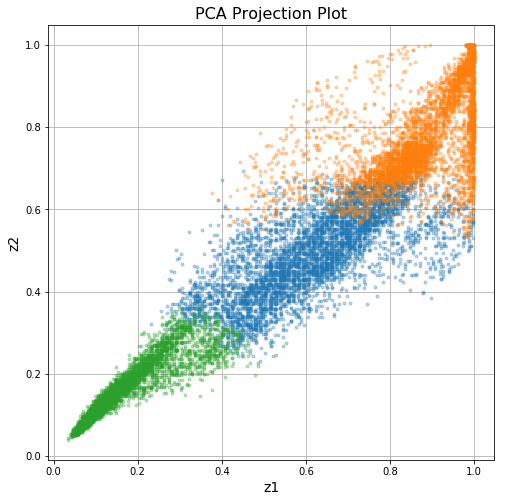

In [219]:
# Make the 2D plot
subX = []
for x in range(len(np.unique(idxs))):
    subX.append(np.array([A[i] for i in range(A.shape[0]) if idxs[i] == x]))
        
fig = plt.figure(figsize=(8,8))
for x in range(len(subX)):
    newX = subX[x]
    plt.plot(newX[:,0],newX[:,1],'.',alpha=0.3)
plt.xlabel('z1',fontsize=14)
plt.ylabel('z2',fontsize=14)
plt.title('PCA Projection Plot',fontsize=16)
plt.grid(True)